# Stage3  
  
---
stage3는 stage2에 이어서 진행합니다.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
house_data = df.drop(['id', 'date'], axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
# Visualization

## for not scaled data

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

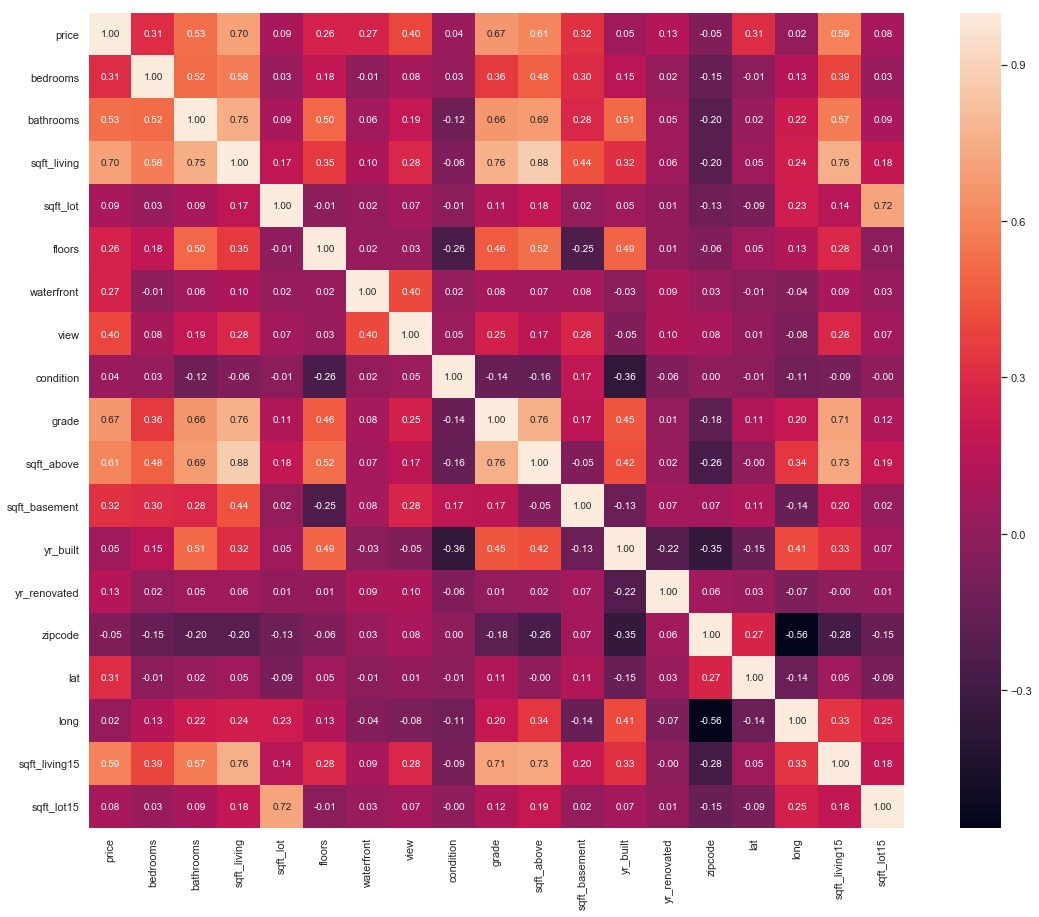

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(house_data.corr(), annot=True, fmt='.2f', square=True)

plt.show()

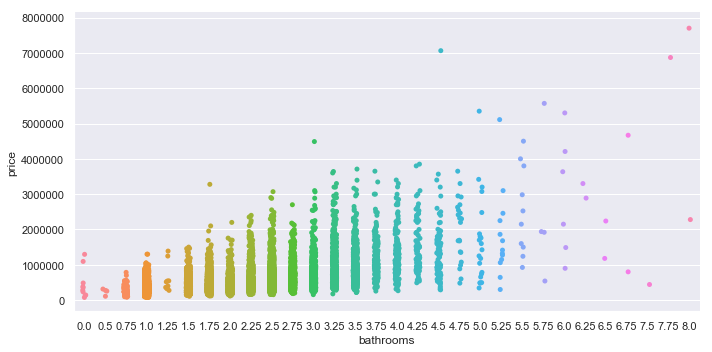

In [7]:
sns.catplot(data=house_data, x='bathrooms', y='price', aspect=2)

In [8]:
house_data['sqft_living'].max()

13540

In [9]:
house_data['price'].max()

7700000.0

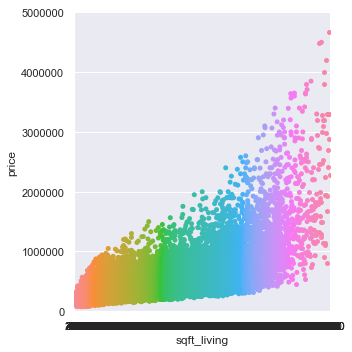

In [10]:
sns.catplot(data=house_data, x='sqft_living', y='price')\
    .set(ylim=(0, 5000000))

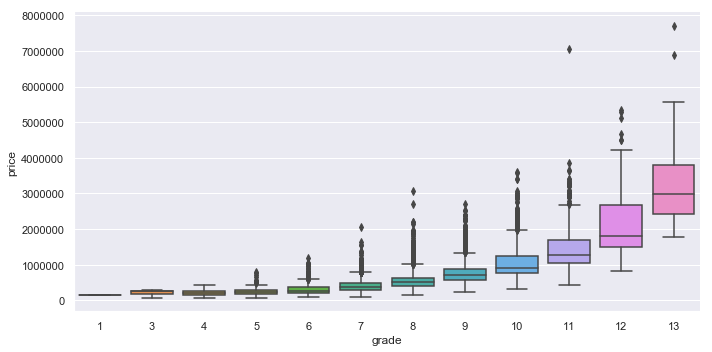

In [11]:
sns.catplot(kind='box', data=house_data, x='grade', y='price', aspect=2)

---
# `여기서부터 Stage3 입니다.`

# Modeling and Testing

## for not scaled data

## 함께실습$1

In [12]:
from sklearn.model_selection import train_test_split

train_data = house_data.drop(['price'], axis=1)
target_data = house_data[['price']]

#train : test set을 8 : 2로 나눠줍니다.
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2)

#다시 train set을 8:2로 나눠 validation set을 만들어줍니다.
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2) 

print('모든 데이터', train_data.shape)
print('training set', x_train.shape, y_train.shape)
print('validation set', x_valid.shape, y_valid.shape)
print('test set', x_test.shape, y_test.shape)

모든 데이터 (21613, 18)
training set (13832, 18) (13832, 1)
validation set (3458, 18) (3458, 1)
test set (4323, 18) (4323, 1)


## 함께실습$2

### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

print("train set score:", lr.score(x_train, y_train))
print("valid set score:", lr.score(x_valid, y_valid))

train set score: 0.6971826953714488
valid set score: 0.7025593452232036


## 함께실습$3

### Polynomial Regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                      LinearRegression()).fit(x_train, y_train)

print("train set score:", model.score(x_train, y_train))
print("valid set score:", model.score(x_valid, y_valid))

train set score: 0.8310750534134186
valid set score: 0.8168010260489841


## 미션$1

In [15]:
model = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(x_train, y_train)

print("train set score:", model.score(x_train, y_train))
print("valid set score:", model.score(x_valid, y_valid))

# 위에서 train_test_split 을 통해 선별되는 train, valid 구성에 따라 점수가 크게 달라질 수 있습니다.
# train, valid set은 랜덤하게 나뉘어집니다.

train set score: 0.8794129175438209
valid set score: -1.652352500281939


## 함께실습$4

### Decision Tree Regressor

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train, y_train)

print("train set score:", tree.score(x_train, y_train))
print("valid set score:", tree.score(x_valid, y_valid))

train set score: 0.9994295520594643
valid set score: 0.7241536080756248


## 함께실습$5

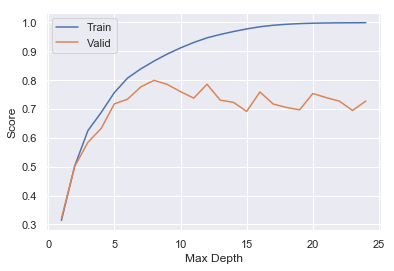

In [17]:
train_score = []
valid_score = []
depth_range = range(1, 25)
for depth in depth_range:
    tree = DecisionTreeRegressor(max_depth=depth).fit(x_train, y_train)
    
    train_score.append(tree.score(x_train, y_train))
    valid_score.append(tree.score(x_valid, y_valid))
    
plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)

plt.legend(['Train', 'Valid'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()